In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
from textblob import TextBlob

In [6]:
!pip install textblob


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!pip install emoji


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import nltk
from nltk.corpus import stopwords
import emoji

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.stem import WordNetLemmatizer

In [10]:
from keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

In [11]:
from keras.layers import LSTM, Dense, SimpleRNN, Embedding, Flatten, Dropout

In [12]:
from keras.activations import softmax
from sklearn.model_selection import train_test_split

In [13]:
df=pd.read_csv('sentiment_tweets3.csv')

In [14]:
df.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [15]:
df['message to examine'][1099]

"..my mother just WON the City of Terrell, Texas District 2 'City Council' Seat  ..i'm M.i.A lol HAPPY MOTHERS DAY"

In [16]:
# 7

In [17]:
df.rename(columns={'message to examine': 'Text', 'label (depression result)': 'Label'}, inplace=True)

In [18]:
df.head()

,Index,Text,Label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [19]:
df.shape

(10314, 3)

In [20]:
df.isnull().sum()

Index    0
Text     0
Label    0
dtype: int64

In [21]:
df['Text']=df['Text'].str.lower()

In [22]:
#df

In [23]:
# HTML tags Remove

In [24]:
def remove_html(text):
    return re.sub(r'<.*?>', '', text)

In [25]:
df['Text']=df['Text'].apply(remove_html)

In [26]:
df.head()

,Index,Text,Label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat need to send 'em to my accountant tomo...,0
4,540,add me on myspace!!! myspace.com/lookthunder,0


In [27]:
# URL Remove

In [28]:
def remove_url(text):
    return re.sub(r'http\S+|www.\S+', '', text)

In [29]:
df['Text']=df['Text'].apply(remove_url)

In [30]:
df.head()

,Index,Text,Label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga,0
2,220,@comeagainjen -,0
3,288,@lapcat need to send 'em to my accountant tomo...,0
4,540,add me on myspace!!! myspace.com/lookthunder,0


In [31]:
# Remove Punctuation

In [32]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [33]:
df['Text']=df['Text'].apply(remove_punctuation)

In [34]:
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek You",
    "ILU": "I Love You",
    "IMHO": "In My Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My Ass Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The Ass",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My Ass Off",
    "SK8": "Skate",
    "STATS": "Your Sex and Age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The Fuck",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick Laugher",
    "TFW": "That Feeling When",
    "MFW": "My Face When",
    "MRW": "My Reaction When",
    "IFYP": "I Feel Your Pain",
    "TNTL": "Trying Not To Laugh",
    "JK": "Just Kidding",
    "IDC": "I Don't Care",
    "ILY": "I Love You",
    "IMU": "I Miss You",
    "ADIH": "Another Day In Hell",
    "ZZZ": "Sleeping, Bored, Tired",
    "WYWH": "Wish You Were Here",
    "TIME": "Tears In My Eyes",
    "BAE": "Before Anyone Else",
    "FIMH": "Forever In My Heart",
    "BSAAW": "Big Smile And A Wink",
    "BWL": "Bursting With Laughter",
    "BFF": "Best Friends Forever",
    "CSL": "Can't Stop Laughing",
    "u": "you",
    "ur": "your",
    "r": "are",
    "y": "why",
}

In [35]:
chat_words={k.lower(): v.lower() for k, v in chat_words.items()}

In [36]:
# chat_words

In [37]:
def expand_chat_words(text, chat_dict):
    words=text.split()
    expanded=[chat_dict.get(word.lower(), word) for word in words]
    return ' '.join(expanded)

In [38]:
df['Text'] = df['Text'].apply(lambda x: expand_chat_words(x, chat_words))

In [39]:
# Apply lemmatization

In [40]:
lemmatizer=WordNetLemmatizer()

In [41]:
def lemmatize_text_basic(text):
    tokens = word_tokenize(text)
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]  # only 'word' is required
    return ' '.join(lemmatized)

In [42]:
from nltk.tokenize import word_tokenize

In [43]:
df['Text']=df['Text'].apply(lemmatize_text_basic)

In [44]:
df.head()

,Index,Text,Label
0,106,just had a real good moment i missssssssss him...,0
1,217,is reading manga,0
2,220,comeagainjen,0
3,288,lapcat need to send em to my accountant tomorr...,0
4,540,add me on myspace myspacecomlookthunder,0


In [45]:
df['Text'][0]

'just had a real good moment i missssssssss him so much'

In [46]:
def reduce_elongation(word):
    return re.sub(r'(.)\1{2,}', r'\1\1', word)  

In [47]:
df['Text']=df['Text'].apply(reduce_elongation)

In [48]:
df['Text'][0]

'just had a real good moment i miss him so much'

In [49]:
tokenizer=Tokenizer(num_words=10000, oov_token='<OOV>')

In [50]:
tokenizer.fit_on_texts(df)

In [51]:
sentiment_labels=df['Label']

In [52]:
cleaned_tweet_texts=df['Text']

In [53]:
cleaned_tweet_texts

0           just had a real good moment i miss him so much
1                                         is reading manga
2                                             comeagainjen
3        lapcat need to send em to my accountant tomorr...
4                  add me on myspace myspacecomlookthunder
                               ...                        
10309    no depression by g herbo is my mood from now o...
10310    what do you do when depression succumbs the br...
10311    ketamine nasal spray show promise against depr...
10312    dont mistake a bad day with depression everyon...
10313                                                    0
Name: Text, Length: 10314, dtype: object

In [54]:
tokenizer.fit_on_texts(cleaned_tweet_texts)

In [55]:
word_index=tokenizer.word_index

In [56]:
tokenizer.word_counts

OrderedDict([('index', 1),
             ('text', 21),
             ('label', 4),
             ('just', 815),
             ('had', 261),
             ('a', 3437),
             ('real', 99),
             ('good', 704),
             ('moment', 35),
             ('i', 4032),
             ('miss', 65),
             ('him', 102),
             ('so', 919),
             ('much', 256),
             ('is', 1759),
             ('reading', 34),
             ('manga', 1),
             ('comeagainjen', 3),
             ('lapcat', 1),
             ('need', 215),
             ('to', 3840),
             ('send', 29),
             ('em', 16),
             ('my', 2349),
             ('accountant', 1),
             ('tomorrow', 153),
             ('oddly', 1),
             ('wasnt', 35),
             ('even', 141),
             ('referring', 6),
             ('tax', 6),
             ('those', 98),
             ('are', 713),
             ('supporting', 8),
             ('evidence', 11),
             ('thou

In [57]:
tokenizer.word_docs

defaultdict(int,
            {'index': 1,
             'text': 19,
             'label': 4,
             'good': 669,
             'much': 243,
             'had': 252,
             'him': 91,
             'i': 2904,
             'moment': 35,
             'a': 2713,
             'miss': 65,
             'so': 850,
             'real': 97,
             'just': 777,
             'manga': 1,
             'reading': 34,
             'is': 1547,
             'comeagainjen': 3,
             'my': 1956,
             'send': 29,
             'referring': 6,
             'lapcat': 1,
             'tax': 6,
             'to': 3016,
             'oddly': 1,
             'em': 16,
             'even': 137,
             'accountant': 1,
             'wasnt': 35,
             'tomorrow': 149,
             'are': 662,
             'supporting': 8,
             'those': 94,
             'though': 102,
             'evidence': 11,
             'need': 208,
             'add': 44,
             'myspace

In [58]:
print(f"Vocabulary size (total unique words): {len(word_index)}")

Vocabulary size (total unique words): 21041


In [59]:
sequences=tokenizer.texts_to_sequences(cleaned_tweet_texts)

In [60]:
print(f"Example sequence: {sequences[0]}")

Example sequence: [24, 84, 5, 204, 28, 491, 2, 300, 199, 22, 86]


In [61]:
max_sequence_length=max(len(tokens) for tokens in sequences)

In [62]:
print(f"Calculated max sequence length: {max_sequence_length}")

Calculated max sequence length: 92


In [63]:
padded_sequences=pad_sequences(sequences, maxlen=max_sequence_length, padding='post', truncating='post')

In [64]:
print(padded_sequences[0])

[ 24  84   5 204  28 491   2 300 199  22  86   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]


In [65]:
padded_sequences.shape

(10314, 92)

In [66]:
Label=np.array(sentiment_labels)

In [67]:
Label.shape

(10314,)

 # Splitting Data: Training, Validation, and Test Sets

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X=padded_sequences
y=Label

# Split into training (70%) and temporary (30%)

In [70]:
X_train, X_temp, y_train, y_temp=train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)

# Split temporary into validation (50% of temp, so 15% of total) and test (50% of temp, so 15% of total)

In [71]:
X_val, X_test, y_val, y_test=train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [72]:
print(f"Training data shape: {X_train.shape}, Labels shape: {y_train.shape}")
print(f"Validation data shape: {X_val.shape}, Labels shape: {y_val.shape}")
print(f"Test data shape: {X_test.shape}, Labels shape: {y_test.shape}")

Training data shape: (7219, 92), Labels shape: (7219,)
Validation data shape: (1547, 92), Labels shape: (1547,)
Test data shape: (1548, 92), Labels shape: (1548,)


# 5. Building the LSTM Model

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

In [74]:
vocab_size=len(tokenizer.word_index)+1

In [75]:
embedding_dim=100
num_classes=2

In [76]:
model=Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length),
    Bidirectional(LSTM(units=128, return_sequences=False)),
    Dropout(0.5),
    Dense(units=2, activation='softmax')
])

model.summary()

C:\Users\Lenovo\anaconda3\envs\tf\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [77]:
max_sequence_length

92

# 6. Compiling the Model

In [78]:
optimizer=Adam(learning_rate=0.001)

In [79]:
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 7. Training the LSTM Model

In [80]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [81]:
early_stopping=EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [82]:
model_checkpoint=ModelCheckpoint('best_sentiment_model.keras', save_best_only=True, monitor='val_loss', mode='min')

In [101]:
print('Start')
history=model.fit(X_train, y_train, 
                 epochs=20, batch_size=32,
                 validation_data=(X_val, y_val),
                 callbacks=[early_stopping, model_checkpoint])
print('End')

Start
Epoch 1/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - accuracy: 0.9929 - loss: 0.0282 - val_accuracy: 0.9916 - val_loss: 0.0374
Epoch 2/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 17s 76ms/step - accuracy: 0.9970 - loss: 0.0117 - val_accuracy: 0.9922 - val_loss: 0.0448
Epoch 3/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 17s 76ms/step - accuracy: 0.9982 - loss: 0.0081 - val_accuracy: 0.9922 - val_loss: 0.0491
Epoch 4/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 17s 76ms/step - accuracy: 0.9978 - loss: 0.0079 - val_accuracy: 0.9922 - val_loss: 0.0443
Epoch 5/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - accuracy: 0.9997 - loss: 0.0019 - val_accuracy: 0.9916 - val_loss: 0.0463
Epoch 6/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 18s 81ms/step - accuracy: 0.9987 - loss: 0.0030 - val_accuracy: 0.9948 - val_loss: 0.0299
Epoch 7/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - accuracy: 0.9970 - loss: 0.0101 - val_accuracy: 0.9916 - val_loss: 0.0398
Epoch 8/20
118/226 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.9996 - loss: 0.00

KeyboardInterrupt: 

## Epoch 1/20   accuracy: 0.8513 - loss: 0.4372 - val_accuracy: 0.9916 - val_loss: 0.0533
## Epoch 2/20   accuracy: 0.9918 - loss: 0.0392 - val_accuracy: 0.9897 - val_loss: 0.0727  # val_loss increased
## Epoch 3/20   accuracy: 0.9910 - loss: 0.0452 - val_accuracy: 0.9916 - val_loss: 0.0396  # val_loss decreased (new best)
## Epoch 4/20   accuracy: 0.9978 - loss: 0.0114 - val_accuracy: 0.9922 - val_loss: 0.0313  # val_loss decreased (NEW BEST!)
## Epoch 5/20   accuracy: 0.9987 - loss: 0.0073 - val_accuracy: 0.9910 - val_loss: 0.0390  # val_loss increased (Patience: 1)
## Epoch 6/20   accuracy: 0.9987 - loss: 0.0037 - val_accuracy: 0.9922 - val_loss: 0.0441  # val_loss increased (Patience: 2)
## Epoch 7/20   accuracy: 0.9993 - loss: 0.0038 - val_accuracy: 0.9922 - val_loss: 0.0442  # val_loss increased (Patience: 3)
## Epoch 8/20   accuracy: 0.9990 - loss: 0.0035 - val_accuracy: 0.9910 - val_loss: 0.0398  # val_loss increased (Patience: 4)
## Epoch 9/20   accuracy: 0.9997 - loss: 0.0018 - val_accuracy: 0.9916 - val_loss: 0.0414  # val_loss increased (Patience: 5 -> STOP)

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model_path='best_sentiment_model.keras'

In [ ]:
try:
    best_model=load_model(model_path)
    print(f"Successfully loaded the best model from '{model_path}'")

except Exception as e:
    print("Proceeding with the 'model' object as is (it should have best weights restored by EarlyStopping).")
    best_model = model

In [84]:
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss: .4f}")
print(f"Test Accuracy: {accuracy: .4f}")

49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9942 - loss: 0.0227
Test Loss:  0.0262
Test Accuracy:  0.9948


In [85]:
from sklearn.metrics import classification_report, confusion_matrix

In [86]:
y_pred_probs=best_model.predict(X_test)

49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


In [95]:
y_pred_classes=np.argmax(y_pred_probs, axis=1)

In [96]:
print(f"Shape of predictions: {y_pred_classes.shape}")
print(f"First 10 predicted classes: {y_pred_classes[:10]}")
print(f"First 10 true classes: {y_test[:10]}")

Shape of predictions: (1548,)
First 10 predicted classes: [0 0 0 0 0 1 1 0 1 0]
First 10 true classes: [0 0 0 0 0 1 1 0 1 0]


In [92]:
print("Classification Report")
target_names = ['Negative', 'Positive']
print(classification_report(y_test, y_pred, target_names=target_names, zero_division=0))

Classification Report
              precision    recall  f1-score   support

    Negative       0.99      1.00      1.00      1201
    Positive       1.00      0.98      0.99       347

    accuracy                           0.99      1548
   macro avg       1.00      0.99      0.99      1548
weighted avg       0.99      0.99      0.99      1548



In [97]:
print("Confusion Matrix")
cm = confusion_matrix(y_test, y_pred_classes)
print(cm)

Confusion Matrix
[[1201    0]
 [   8  339]]


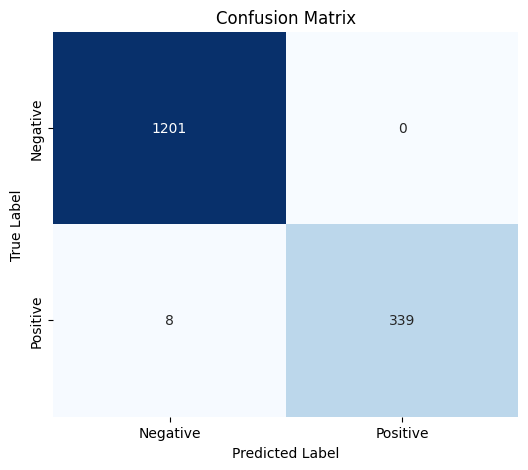

In [99]:
import seaborn as sns
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()